# k-MEANS EXERCICE

# CHALLENGE

For this challenge, I invite you to to the following:

1. Import and prepare the `iris` dataset.
1. Conduct a k-means cluster analysis.
1. Visualize the clusters.

# IMPORT LIBRARIES

In [1]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data

# LOAD DATA
Read the `iris` from "iris.csv" in the data folder and save in `df`.

In [2]:
# Reads the .csv file into variable df
df = pd.read_csv('iris.csv')

# Displays the first 5 rows of df
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

<Axes: xlabel='species', ylabel='count'>

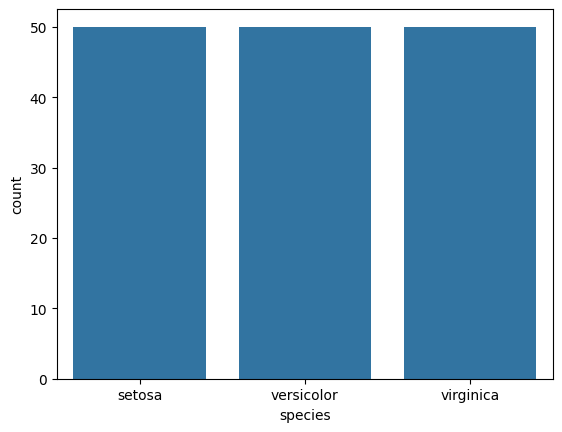

In [4]:
sns.countplot(x = "species", data = df)

In [5]:
y = df.species

# Removes the y column from df
X = df.drop('species', axis=1)

In [6]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
# Displays the first 5 rows of df
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***k-MEANS***

In [23]:
# Sets up the kMeans object
km = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fits the model to the data
km.fit(X_train)

# Displays the parameters of the fitted model
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
from sklearn.model_selection import GridSearchCV     # For parameter optimization


# Search parameters
param = range(3, 30, 1)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(km,{'n_init': param})

# Fits the grid object and gets the best model
best_km = grid.fit(X_train,y_train).best_estimator_

# Displays the optimum model
best_km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 13,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

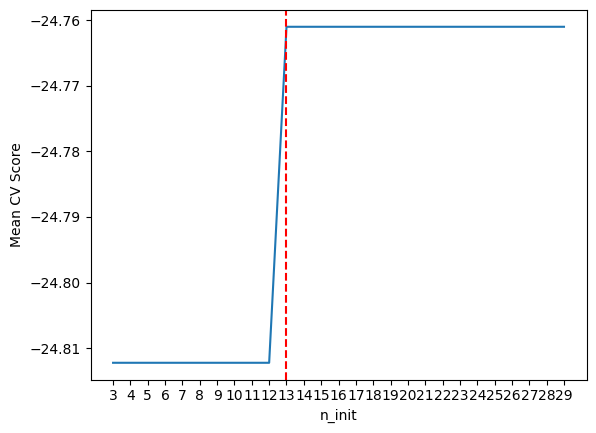

In [12]:
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_init')

# Draws a vertical line where the best model is
plt.axvline(x=best_km.n_init,color='red', ls='--')

In [13]:
# Sets up the kMeans object
km2 = KMeans(n_clusters=3, random_state=42, n_init=13)

# Fits the model to the data
km2.fit(X_train)

# Displays the parameters of the fitted model
km2.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 13,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

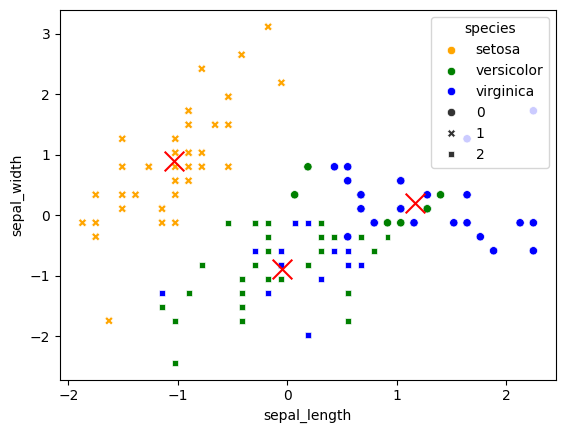

In [14]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    data=X_train,
    hue=y_train,
    style=km.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')

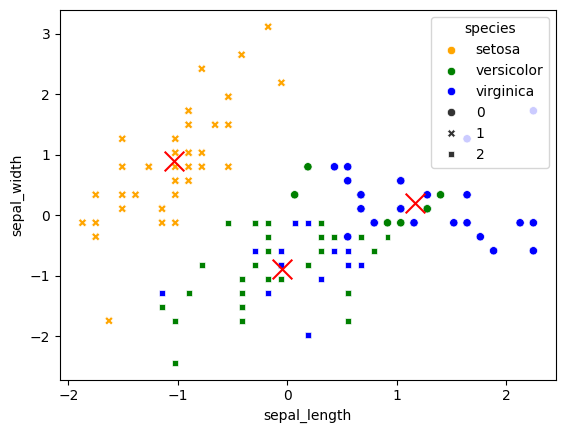

In [15]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    data=X_train,
    hue=y_train,
    style=km2.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km2.cluster_centers_[:,0],
    km2.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')

In [16]:
km2.score(X_test, y_test)

-27.244018117158358

In [17]:
km.score(X_test, y_test)

-27.244018117158358